# Performance distributions of Resnet and the AS Reader

author: Ondrej Bajgar (OBajgar@cz.ibm.com), IBM Watson

paper: Bajgar, O., Kadlec, R., and Kleindienst, J. *A Boo(n) for Evaluating Architecture Performance*. ICML 2018.


(What concerns content, this is a strict extension of what is provided in section *4. Experiment Results* from the ICML paper. If you want a condensed version, read the paper. If you want full details including code, continue reading this and you can skip the section in the paper.)

To estimate the random variation of results, we repeatedly trained models from two domains of deep learning: the ResNet (He et al., 2016) on the CIFAR-100 dataset (Krizhevsky & Hinton, 2009) to represent image recognition and the Attention-Sum Reader (Kadlec et al., 2016) on the Children's Book Test - Common Nouns (Hill et al. 2016) to represent reading comprehension. 

We believe these two models are representative of models in their respective areas -- Resnet is based on a deep convolutional network architecture as most models in machine vision, while the AS Reader is based on a bidirectional GRU network with attention, as is the case for many models in Reading Comprehension and other areas of natural language processing.

The full protocol of running the trainings will soon be added to a separate document in the repository (for now, see the description in the appendix of the paper). What is important for this analysis is that each run yields a pair of a validation and test performance. Let's load these results in the form of Pandas DataFrames:

In [2]:
import load_results
# Results of Resnet on CIFAR100 with fixed hyperparameters
resnet = load_results.cifar100_resnet()
# Results of AS Reader on CBT CN with random hyperparameter search: 
cbtrs = load_results.cbt_rs()
# Results of AS Reader on CBT CN with fixed hyperparameters:
cbt, bv = load_results.cbt_fh()

Specifically, we trained 74 instances of Resnet with fixed hyperparameters, 370 instances of the AS Reader with fixed hyperparameters, and 197 instances of the AS Reader with randomly sampled hyperparameters.

In [3]:
len(resnet), len(cbt), len(cbtrs)

(74, 370, 197)

Let's have a look at some basic properties of the distributions. 

In [4]:
import pandas as pd
summary = pd.DataFrame({'Resnet (fixed hp.)': resnet['Precision_test'].describe(), 'AS Reader (fixed hp.)': cbt['accuracy'].describe(), 'AS Reader (random hp.)': cbtrs['cbtest_CN_test_2500ex.txt_accuracy'].describe()})
summary.loc["interquartile",:]=summary.loc["75%",:]-summary.loc["25%",:]
summary

,AS Reader (fixed hp.),AS Reader (random hp.),Resnet (fixed hp.)
count,370.000000,197.000000,74.000000
mean,0.631571,0.612571,0.684505
std,0.009365,0.024826,0.006324
min,0.598800,0.486400,0.670000
25%,0.626000,0.600800,0.680200
50%,0.631800,0.618000,0.684500
75%,0.638000,0.629600,0.689900
max,0.652800,0.658800,0.697600
interquartile,0.012000,0.028800,0.009700


Let's plot the histograms:

### Resnet:

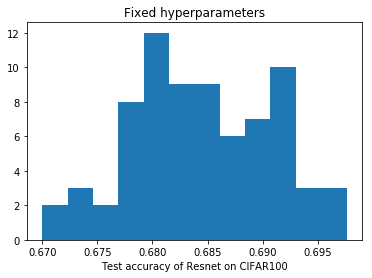

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.hist(resnet['Precision_test'], bins=12)
ax.set_title('Fixed hyperparameters')
ax.set_xlabel('Test accuracy of Resnet on CIFAR100')
# The saved plots are then included in the paper.
plt.savefig('figures/resnet_hist.pdf',format='pdf')

### AS Reader

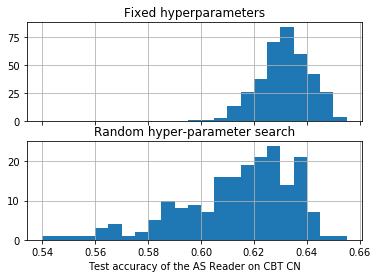

In [6]:
import numpy as np
f, (ax1, ax2) = plt.subplots(2, sharex=True)#, sharey=True)
splits=np.arange(0.54,0.66,0.005)

ax2.set_title('Random hyper-parameter search')
cbtrs['cbtest_CN_test_2500ex.txt_accuracy'].hist(bins=splits, histtype='bar', ax=ax2)

ax1.set_title('Fixed hyperparameters')
cbt['accuracy'].hist(bins=splits, histtype='bar', ax=ax1)
ax2.set_xlabel('Test accuracy of the AS Reader on CBT CN')
plt.savefig('figures/asreader_cbt_cn.pdf',format='pdf')

## Comparison to improvements between published results

To put the result variability in context, we looked at the differences in reported performance between published architectures on the two tasks as listed in two recent papers: Huang et al. (2017) for CIFAR and Munkhdalai and Yu (2017) for the Children's Book Test.

On CIFAR-100, the models listed in the paper had the following error rates (which we convert to accuracies to match the rest of our results):

In [7]:
cifar100_errors = np.array([33.71,34.57,32.39,23.3,23.73,27.22,24.58,22.07,20.50,24.33,22.71,17.18])
cifar100_accuracies = 1.0 - cifar100_errors
def median_delta(x):
    x2 = np.sort(x)
    deltas = x2[1:]-x2[:-1]
    return np.median(deltas)
median_delta(cifar100_accuracies)

0.8599999999999994

In [8]:
cbt_cn_accuracies = [63.,63.4,63.9,67.4,69.2,69.4,71.9]
median_delta(cbt_cn_accuracies)

1.1499999999999986

With fixed hyper-parameters, the interquartile ranges of the models' error rates were $0.98\%$ and $1.20\%$ (absolute) while the median difference between subsequent published architectures is $0.86\%$ and $1.48\%$ respectively. 

Hence, the random variation even in a model with fixed hyperparameters cannot be considered negligible in the context of improvements reported for new architectures. Still, any consideration for this variability is currently often completely ommited from papers.

Furthermore, if we allow the hyper-parameters to vary (in our case by random search), the result variance further increases, which further amplifies the outlined effects. In the case of the AS Reader the interquartile range increased to $2.9\%$ when we randomly picked hyper-parameters from a range applicable to training the model on a single GPU. 

## Test-validation correlation

To be added soon (within a week or so).


## Performance improves with an increasing number of experiments

To be added soon (within a week or so).


## References

He, K., Zhang, X., Ren, S., & Sun, J. *Deep residual learning for image recognition*. CVPR, 2016.

Hill,  F.,  Bordes,  A.,  Chopra,  S.,  and  Weston,  J.    *The Goldilocks principle: Reading children’s books with ex-plicit memory representations*. ICLR, 2016

Huang, G., Liu, Z., Weinberger, K. Q., and van der Maaten,L. *Densely connected convolutional networks*. CVPR, 2017.

Kadlec, R., Schmid, M., Bajgar, O., and Kleindienst, J. *Text Understanding with the Attention-Sum Reader Network*. ACL, 2016.

Krizhevsky, A. and Hinton, G. *Learning multiple layers offeatures from tiny images*. 2009.

Munkhdalai, T. and Yu, H *Reasoning with memory augmented neural networks for language comprehension*. ICLR, 2017.

## License
© Copyright IBM Corporation. 2018.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.